In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape
print(dataHP.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean())> 0]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean() 
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [10]:
cols_rescatables = prop_nan_per_col[prop_nan_per_col <= 0.05]
cols_rescatables

MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
dtype: float64

In [11]:
dataHP[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']]

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr
...,...,...,...,...,...,...,...,...
1455,None,0.0,Gd,TA,No,Unf,Unf,SBrkr
1456,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr
1457,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr
1458,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA


In [13]:
media = dataHP['MasVnrArea'].mean()
mediana =dataHP['MasVnrArea'].median()
print(f"Media:{media}")
print(f"Mediana:{mediana}")

Media:103.68526170798899
Mediana:0.0


In [14]:
dataHP['MasVnrArea_mean']=np.round(dataHP['MasVnrArea'].fillna(media),2)

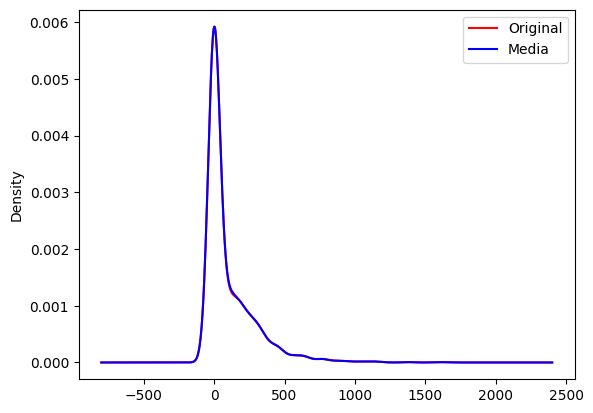

In [16]:
gra=plt.figure()
ax =gra.add_subplot(111)
dataHP['MasVnrArea'].plot.density(color='red',label='Original')
dataHP['MasVnrArea_mean'].plot.density(color='blue',label='Media')
ax.legend()
plt.show()

In [17]:
media = dataHP['GarageYrBlt'].mean()
mediana =dataHP['GarageYrBlt'].median()
print(f"media:{media}")
print(f"mediana:{mediana}")

media:1978.5061638868744
mediana:1980.0


In [18]:
dataHP['GarageYrBlt_mean']=np.round(dataHP['MasVnrArea'].fillna(media),2)
dataHP['GarageYrBlt_median']=np.round(dataHP['MasVnrArea'].fillna(mediana),2)

<Axes: ylabel='Density'>

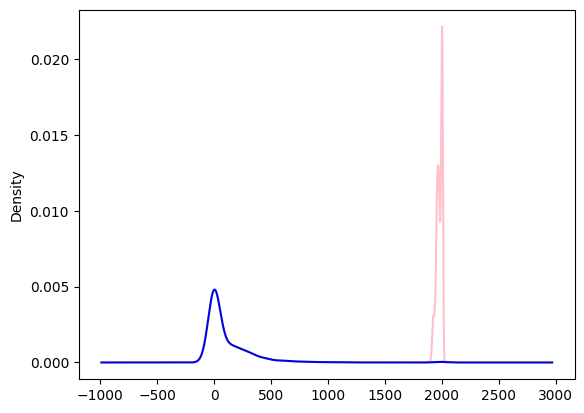

In [22]:
gra=plt.figure()
ax =gra.add_subplot(111)
dataHP['GarageYrBlt'].plot.density(color='pink',label='Original')
dataHP['GarageYrBlt_mean'].plot.density(color='yellow',label='Media')
dataHP['GarageYrBlt_median'].plot.density(color='blue',label='Mediana')


In [23]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean()) <= 0.05]
cols_rescatables
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 84), (1412, 73))

In [31]:
dataHP[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].dtypes 

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [40]:
def getColumnTypes(dataset):
    
    continuas = []
    discretas = []
    categoricas = []
    for col in dataset.columns:
        if dataset[col].dtypes == 'int64' or dataset[col].dtype == 'float64':
            if len(dataset[col].unique()) > 30:
                continuas.append(col)
            else:
                if dataset[col].isnull().sum() > 0:
                    media_nan = dataset[col][dataset[col].notnull()].mean()
                    porcentaje_nan = dataset[col].isnull().sum() / len(dataset)
                    if porcentaje_nan < 0.05:
                        discretas.append(col)
                        print(f"{col} es una Variable Discreta. Media de NaN: {media_nan}")
                    else:
                        categoricas.append(col)
                else:
                    discretas.append(col)
        else: 
            categoricas.append(col) 
    return continuas, discretas, categoricas

In [41]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(categoricas)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [42]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(categoricas)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [43]:
dataset_cat_missing = dataHP[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','SalePrice']]
dataset_cat_missing.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [44]:
dataset_cat_missing.isna().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [45]:
cat_cols_rescatables = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
nan_ratios = dataHP[cat_cols_rescatables].isna().mean()
col_nan_aceptable = nan_ratios[(nan_ratios < 0.05) & (nan_ratios > 0)]
col_nan_aceptable_df = pd.DataFrame({'Columna': col_nan_aceptable.index, 'Porcentaje de NaN': col_nan_aceptable.values})
print(col_nan_aceptable)

MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
dtype: float64


In [47]:
cat_cols_rescatables = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']                        
data_cat = dataHP[cat_cols_rescatables]
for col in cat_cols_rescatables:
       print(data_cat[col].value_counts(dropna=False)/len(cat_cols_rescatables))

None       123.428571
BrkFace     63.571429
Stone       18.285714
BrkCmn       2.142857
NaN          1.142857
Name: MasVnrType, dtype: float64
TA     92.714286
Gd     88.285714
Ex     17.285714
NaN     5.285714
Fa      5.000000
Name: BsmtQual, dtype: float64
TA     187.285714
Gd       9.285714
Fa       6.428571
NaN      5.285714
Po       0.285714
Name: BsmtCond, dtype: float64
No     136.142857
Av      31.571429
Gd      19.142857
Mn      16.285714
NaN      5.428571
Name: BsmtExposure, dtype: float64
Unf    61.428571
GLQ    59.714286
ALQ    31.428571
BLQ    21.142857
Rec    19.000000
LwQ    10.571429
NaN     5.285714
Name: BsmtFinType1, dtype: float64
Unf    179.428571
Rec      7.714286
LwQ      6.571429
NaN      5.428571
BLQ      4.714286
ALQ      2.714286
GLQ      2.000000
Name: BsmtFinType2, dtype: float64
SBrkr    190.571429
FuseA     13.428571
FuseF      3.857143
FuseP      0.428571
Mix        0.142857
NaN        0.142857
Name: Electrical, dtype: float64


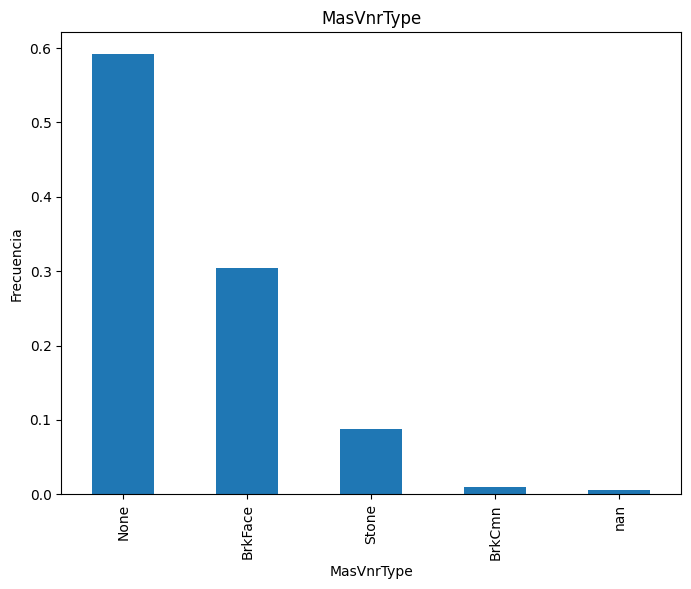

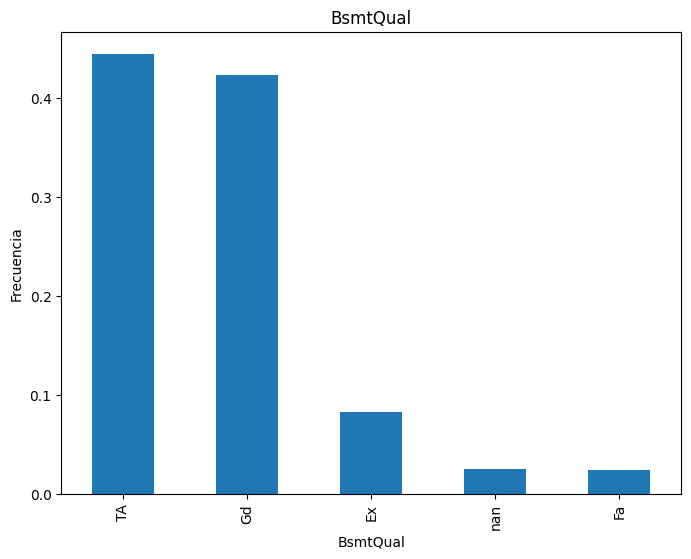

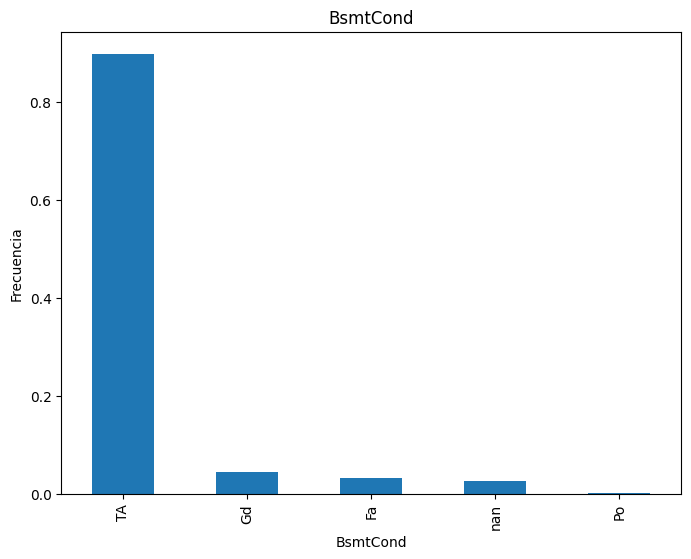

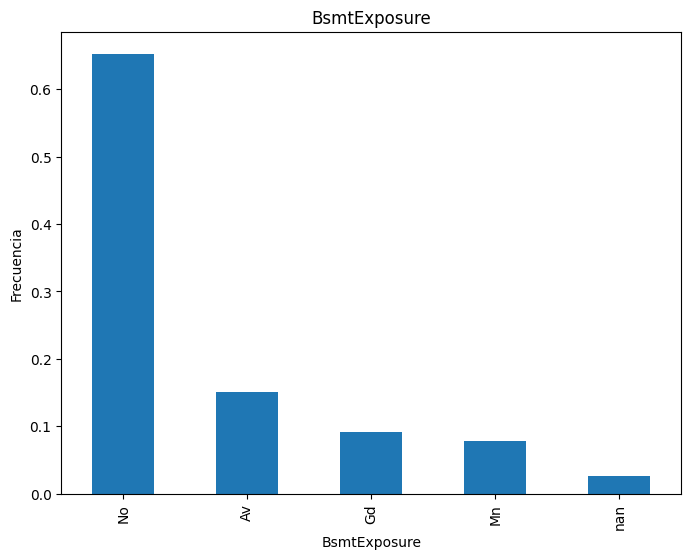

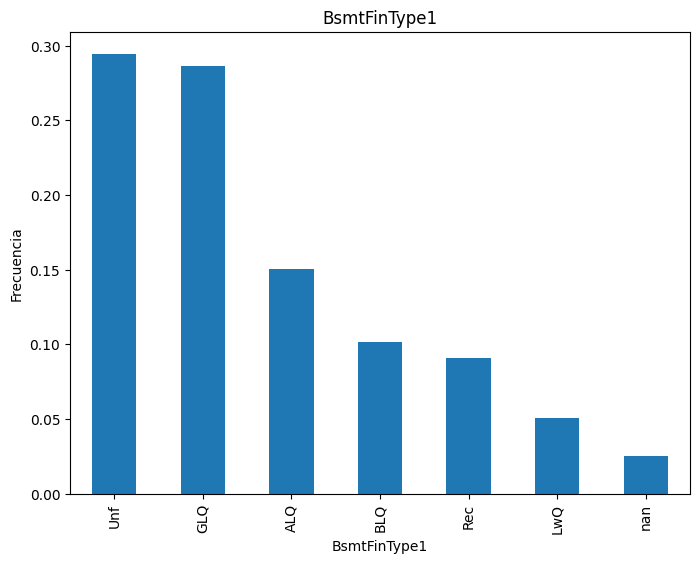

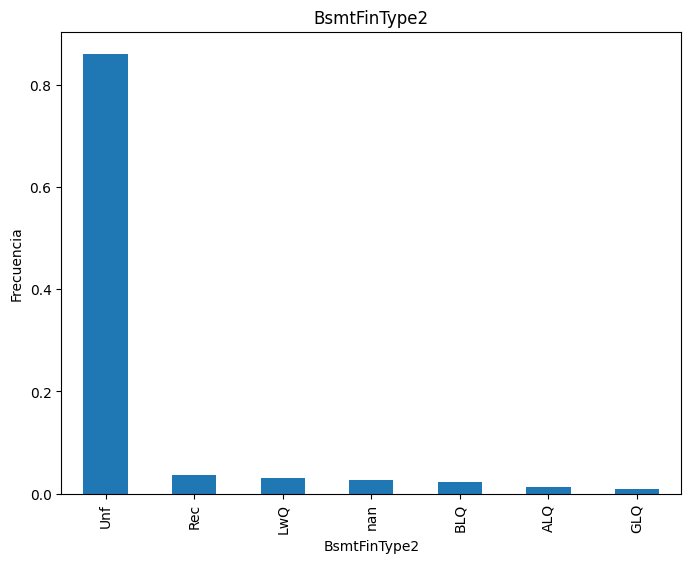

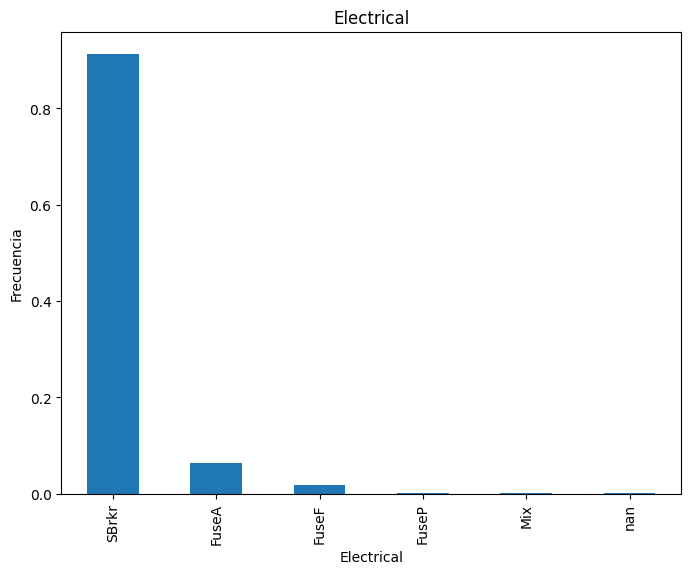

In [48]:
for col in cat_cols_rescatables:
    plt.figure(figsize=(8, 6))
    data_cat[col].value_counts(dropna=False, normalize=True).plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [49]:
import seaborn as sns

def plot_density(dataframe, column):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)

    colors = sns.color_palette('bright', n_colors=len(dataframe[column].unique()))

    for i, value in enumerate(dataframe[column].unique()):
        sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])

    ax.set_xlabel('SalePrice')
    ax.set_ylabel('Densidad')
    ax.set_title(f'{column}')
    ax.legend()
    plt.show()

<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated 

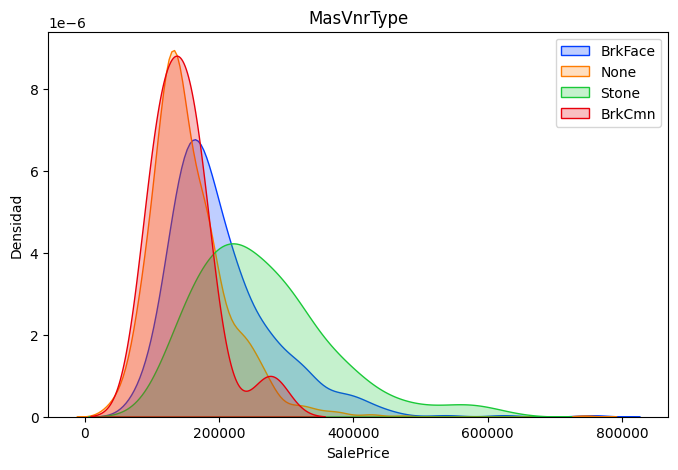

<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated 

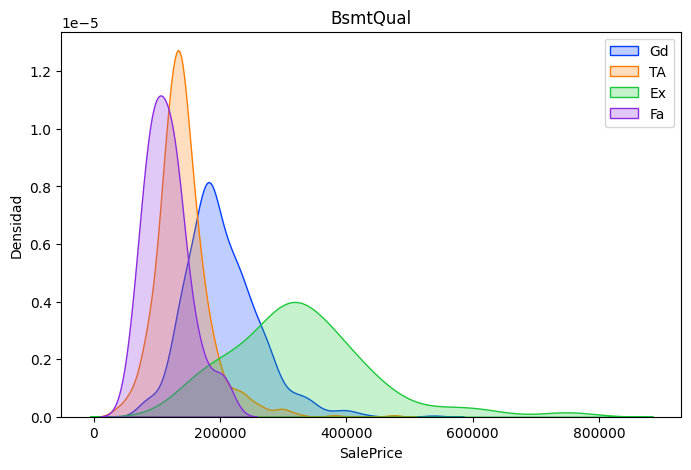

<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated 

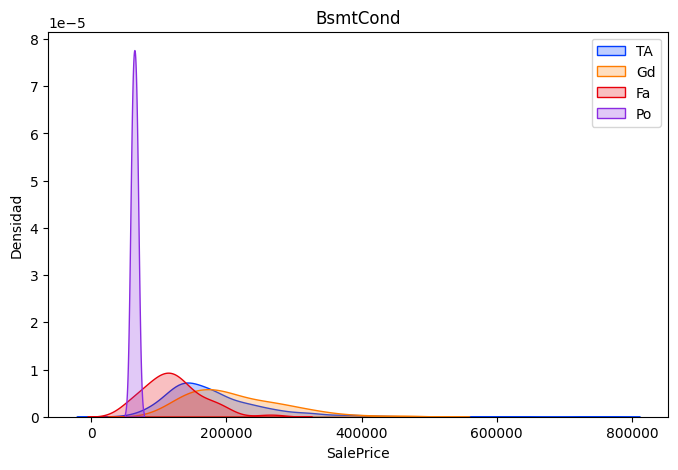

<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated 

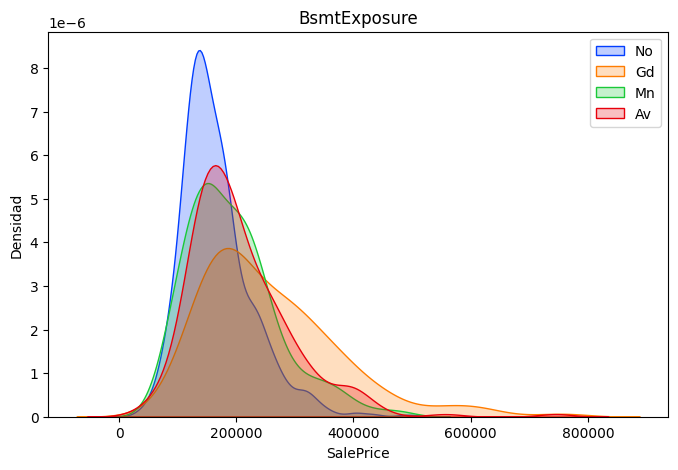

<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated 

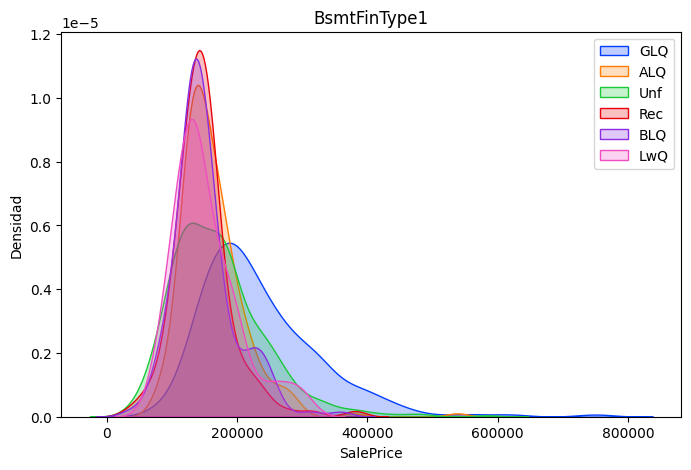

<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated 

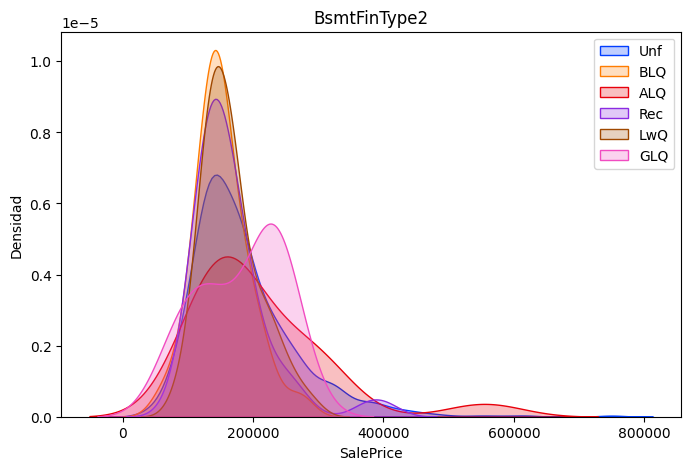

<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-49-b29cb4220603>:10: FutureWarning: 

`shade` is now deprecated 

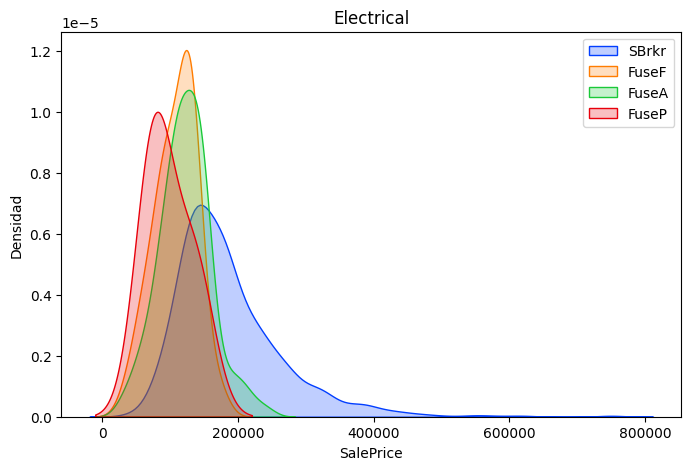

In [50]:
for col in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']:
    plot_density(dataHP, col)

In [51]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames: 
        if(dataset[col].dtype=='object'): 
            cat_colnames.append(col) 
    return cat_colnames

In [52]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [54]:
cat_cols.append('SalePrice')

In [55]:
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [56]:
all_col = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                  'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                  'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                  'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

pd.get_dummies(dataset_categories['MSZoning'])
pd.get_dummies(dataset_categories['Street'])
pd.get_dummies(dataset_categories['Alley'])
pd.get_dummies(dataset_categories['LotShape'])
pd.get_dummies(dataset_categories['LandContour'])
pd.get_dummies(dataset_categories['Utilities'])
pd.get_dummies(dataset_categories['LotConfig'])
pd.get_dummies(dataset_categories['LotConfig'])
pd.get_dummies(dataset_categories['LandSlope'])
pd.get_dummies(dataset_categories['Neighborhood'])
pd.get_dummies(dataset_categories['Condition1'])
pd.get_dummies(dataset_categories['Condition2'])
pd.get_dummies(dataset_categories['BldgType'])
pd.get_dummies(dataset_categories['Condition2'])
pd.get_dummies(dataset_categories['HouseStyle'])
pd.get_dummies(dataset_categories['RoofStyle'])
pd.get_dummies(dataset_categories['RoofMatl'])
pd.get_dummies(dataset_categories['Exterior2nd'])
pd.get_dummies(dataset_categories['MasVnrType'])
pd.get_dummies(dataset_categories['ExterQual'])
pd.get_dummies(dataset_categories['ExterCond'])
pd.get_dummies(dataset_categories['Foundation'])
pd.get_dummies(dataset_categories['BsmtQual'])
pd.get_dummies(dataset_categories['BsmtCond'])
pd.get_dummies(dataset_categories['BsmtExposure'])
pd.get_dummies(dataset_categories['BsmtFinType1'])
pd.get_dummies(dataset_categories['BsmtFinType2'])
pd.get_dummies(dataset_categories['Heating'])
pd.get_dummies(dataset_categories['HeatingQC'])
pd.get_dummies(dataset_categories['CentralAir'])
pd.get_dummies(dataset_categories['Electrical'])
pd.get_dummies(dataset_categories['KitchenQual'])
pd.get_dummies(dataset_categories['Functional'])
pd.get_dummies(dataset_categories['FireplaceQu'])
pd.get_dummies(dataset_categories['GarageType'])
pd.get_dummies(dataset_categories['GarageFinish'])
pd.get_dummies(dataset_categories['GarageQual'])
pd.get_dummies(dataset_categories['GarageCond'])
pd.get_dummies(dataset_categories['PavedDrive'])
pd.get_dummies(dataset_categories['PoolQC'])
pd.get_dummies(dataset_categories['Fence'])
pd.get_dummies(dataset_categories['MiscFeature'])
pd.get_dummies(dataset_categories['SaleType'])
pd.get_dummies(dataset_categories['SaleCondition'])

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


In [57]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [58]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,181500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,223500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,140000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,250000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,210000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,266500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,142125,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
